Number of publications per author

In [2]:
from os import listdir
from os.path import isfile, join
import os
import pandas
import matplotlib.pyplot as plt
import fos_reader
import multiprocessing
import math
from author_simple_reader import reader
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [3]:
def reader_author_year(fileName):
    df = pandas.read_json(fileName, lines=True)
    authors_with_nan_year = df[["authors", "year"]]
    authors_with_year = authors_with_nan_year.loc[authors_with_nan_year["year"].apply(lambda year: not math.isnan(year))]
    mod_authors = authors_with_year
    mod_authors["authors"] = authors_with_year["authors"].apply(lambda row: [int(field["index"]) for field in row])
    return mod_authors

In [4]:
import re
dblp_part_regex = re.compile("author_indexed_fos*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)

In [5]:
part_files = list(part_files_filter_obj)

In [6]:
list_of_dataframes = list(map(reader_author_year, part_files))

/home/seleythen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [8]:
df_year_as_int = df
df_year_as_int["year"] = df["year"].apply(lambda x: int(x))

In [9]:
years = df_year_as_int["year"]

In [21]:
count_by_year_year = years.groupby(years).count()

In [22]:
reduced_count_by_year_year = count_by_year_year.loc[1935:]

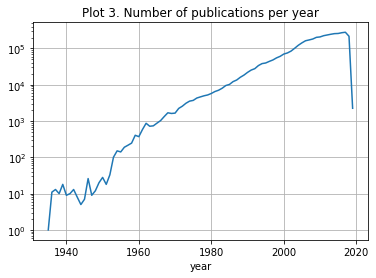

In [24]:
ax = reduced_count_by_year_year.plot(y="title", 
                                title="Plot 3. Number of publications per year", 
                                label="Number of publications in year")
plt.yscale("log")
ax.grid(True, which='major', axis='x' )
ax.grid(True, which='major', axis='y' )

In [27]:
list_of_dataframes = list(map(reader, part_files))
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [28]:
values = df.to_numpy()

In [30]:
df

0                                           [512620, 516358]
1                   [193842, 193843, 516359, 193844, 516360]
2                    [367061, 209885, 378615, 84635, 283544]
3                           [516361, 516362, 516363, 516364]
4                   [276446, 196814, 516365, 299946, 516366]
                                 ...                        
4074431                       [369279, 151828, 3344, 369280]
4074432    [350317, 350318, 369281, 350319, 350320, 35032...
4074433                                     [213172, 244804]
4074434                 [212342, 2323, 54789, 369283, 28254]
4074435             [369284, 369285, 369286, 369287, 369288]
Name: authors, Length: 4074436, dtype: object

In [29]:
df["authors"].apply(lambda x: map(lambda y: y["id"], x)).apply(lambda x: list(x))

KeyError: 'authors'

In [31]:
import numpy as np
map_obj = map(lambda authors_list: np.array(authors_list), df)

In [32]:
np_array = np.array(list(map_obj))

In [33]:
np_array

array([array([512620, 516358]),
       array([193842, 193843, 516359, 193844, 516360]),
       array([367061, 209885, 378615,  84635, 283544]), ...,
       array([213172, 244804]),
       array([212342,   2323,  54789, 369283,  28254]),
       array([369284, 369285, 369286, 369287, 369288])], dtype=object)

In [34]:
authors_list = np.concatenate(np_array)

In [35]:
authors_df = pandas.Series(authors_list)

In [36]:
counted_authors = authors_df.groupby(authors_df).count()

In [37]:
counted_authors

0          29
1           1
2           1
3          48
4          92
           ..
3631721     1
3631722     1
3631723     1
3631724     1
3631725     1
Length: 3631726, dtype: int64

In [38]:
counted_authors.mean()

3.394064420058121

In [39]:
counted_authors.max()

1142

In [42]:
sorted_authors = counted_authors.sort_values(ascending=True)

In [49]:
authors = sorted_authors.reset_index()[0]

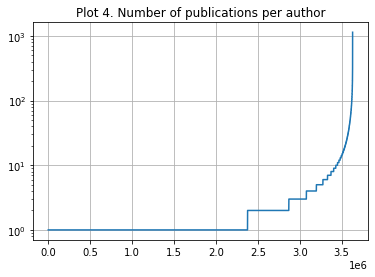

In [50]:
ax = authors.plot(title="Plot 4. Number of publications per author")
plt.yscale("log")
ax.grid(True, which='major', axis='x' )
ax.grid(True, which='major', axis='y' )

In [51]:
number_of_publications = counted_authors.groupby(counted_authors).count()

Text(0, 0.5, 'Amount of authors')

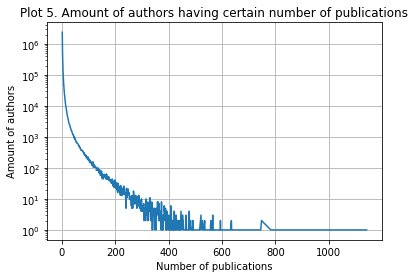

In [52]:
ax=number_of_publications.plot(title="Plot 5. Amount of authors having certain number of publications")
plt.yscale("log")
ax.grid(True, which='major', axis='x' )
ax.grid(True, which='major', axis='y' )
ax.set_xlabel("Number of publications")
ax.set_ylabel("Amount of authors")